In [1]:
# Visualize the classification results
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, average_precision_score

In [19]:
def calculate_metrics(y_true, y_pred, y_prob=None):
    """
    Calculate various metrics for multi-class classification.

    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.
    y_prob (array-like, optional): Predicted probabilities for each class.

    Returns:
    dict: A dictionary containing the calculated metrics.
    """
    metrics = {}
    
    # Macro and Micro F1 scores
    metrics['macro_f1'] = f1_score(y_true, y_pred, average='macro')
    metrics['micro_f1'] = f1_score(y_true, y_pred, average='micro')
    
    # Precision and Recall
    metrics['precision'] = precision_score(y_true, y_pred, average='macro', zero_division=0)
    metrics['recall'] = recall_score(y_true, y_pred, average='macro', zero_division=0)
    
    if y_prob is not None:
        # AUC and Precision-Recall AUC
        metrics['auc'] = roc_auc_score(y_true, y_prob, multi_class='ovr', average='macro')
        metrics['pr_auc'] = average_precision_score(y_true, y_prob, average='macro')
    
    return metrics

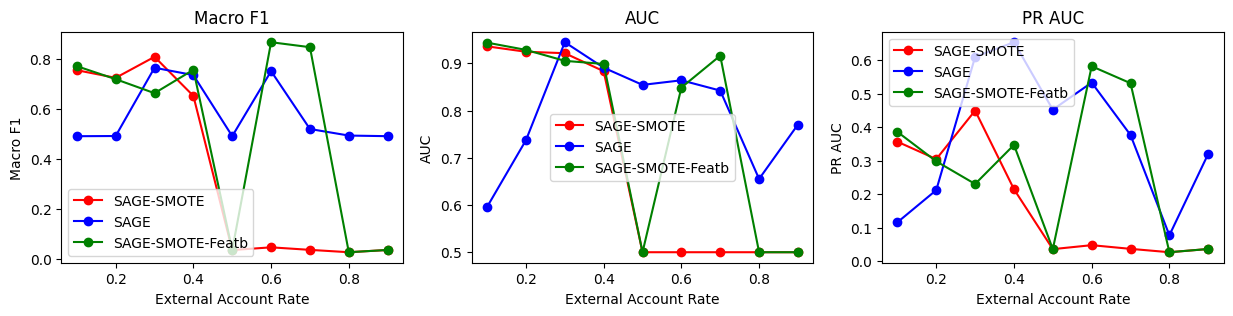

In [20]:
# Load the data
data_name = "amlsim_mixed"
ext_rates = np.arange(0.1, 1, 0.1)
ext_rates = np.array([np.round(x, 1) for x in ext_rates])
origin_results = {}
smote_results = {}
featb_results = {}
for ext_rate in ext_rates:
    ext_rate = round(ext_rate, 1)
    origin_results[ext_rate] = np.load(f"outputs/{data_name}/baseline_hetero_SAGE_ext_{ext_rate}.npz")
    smote_results[ext_rate] = np.load(f"outputs/{data_name}/baseline_hetero_SAGE-SMOTE_ext_{ext_rate}.npz")
    featb_results[ext_rate] = np.load(f"outputs/{data_name}/baseline_hetero_SAGE-SMOTE-Featb_ext_{ext_rate}.npz")
    
    
# Get the metrics for each experiment
smote_metrics = {}
origin_metrics = {}
featb_metrics = {}
for ext_rate in ext_rates:
    test_mask = smote_results[ext_rate]['test_mask']
    y_true = smote_results[ext_rate]['true'][test_mask]
    y_pred = smote_results[ext_rate]['pred_scores'].argmax(axis=1)[test_mask]
    y_prob = smote_results[ext_rate]['pred_scores'][:,1][test_mask]
    smote_metrics[ext_rate] = calculate_metrics(y_true, y_pred, y_prob)
    
    test_mask = origin_results[ext_rate]['test_mask']
    y_true = origin_results[ext_rate]['true'][test_mask]
    y_pred = origin_results[ext_rate]['pred_scores'].argmax(axis=1)[test_mask]
    y_prob = origin_results[ext_rate]['pred_scores'][:,1][test_mask]
    origin_metrics[ext_rate] = calculate_metrics(y_true, y_pred, y_prob)
    
    test_mask = featb_results[ext_rate]['test_mask']
    y_true = featb_results[ext_rate]['true'][test_mask]
    y_pred = featb_results[ext_rate]['pred_scores'].argmax(axis=1)[test_mask]
    y_prob = featb_results[ext_rate]['pred_scores'][:,1][test_mask]
    featb_metrics[ext_rate] = calculate_metrics(y_true, y_pred, y_prob)
    
# Plot the metrics of Macro_f1, AUC, and PR_AUC with respect to the extension rate of three models
metrics = ['macro_f1', 'auc', 'pr_auc']
metric_names = ['Macro F1', 'AUC', 'PR AUC']
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
for i, metric in enumerate(metrics):
    ax[i].plot(ext_rates, [smote_metrics[ext_rate][metric] for ext_rate in ext_rates], label='SAGE-SMOTE', color='r',marker='o')
    ax[i].plot(ext_rates, [origin_metrics[ext_rate][metric] for ext_rate in ext_rates], label='SAGE', color='b',marker='o')
    ax[i].plot(ext_rates, [featb_metrics[ext_rate][metric] for ext_rate in ext_rates], label='SAGE-SMOTE-Featb', color='g',marker='o')
    ax[i].set_xlabel('External Account Rate')
    ax[i].set_ylabel(metric_names[i])
    ax[i].set_title(metric_names[i])
    ax[i].legend()

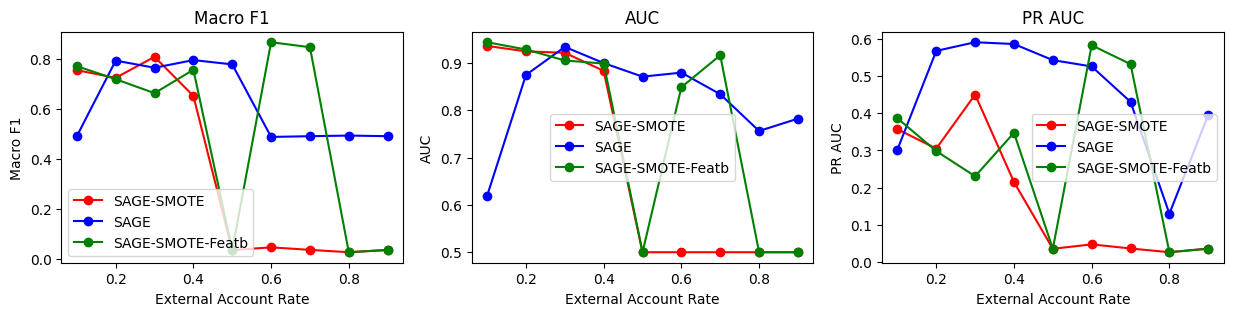